**In this mini project I will apply Singular Value Decomposition (SVD) to compress photos, SVD is an amazing linear algebra technique, SVD removes less important information (lower singular values) which often corresponds to noise and captures the essential structure in a lower-dimensional form, you can use SVD in PCA algorithm to apply dimensionality reduction and visualize complex data into 2D.**

In [2]:
from scipy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import io
from PIL import Image

In [3]:
def compress_img(pic,k,showpic):
    '''
    pic is the image path. -preferably PNG-
    k is the amount of singular values you want to keep -the bigger k the better the quality but the bigger the size and vice versa-
    showpic is a boolean incase you want to visualize the image
    '''
    if isinstance(pic, np.ndarray):
        img = pic
    else:
        img = plt.imread(pic)
    R = img[:, :, 0]  # Red channel
    G = img[:, :, 1]  # Green channel
    B = img[:, :, 2]  # Blue channel
    
    Ur, Sr, Vtr = svd(R) #Getting the components of the Matrix by performing svd on each color channel
    Ug, Sg, Vtg = svd(G)
    Ub, Sb, Vtb = svd(B)
    
    R_compressed = np.dot(Ur[:, :k], np.dot(np.diag(Sr[:k]), Vtr[:k, :])) #Take only singular values up to k, we convert S into a diagonal matrix to
    G_compressed = np.dot(Ug[:, :k], np.dot(np.diag(Sg[:k]), Vtg[:k, :])) #Match dimensions of U and Vt
    B_compressed = np.dot(Ub[:, :k], np.dot(np.diag(Sb[:k]), Vtb[:k, :]))

    img_compressed = np.stack((R_compressed, G_compressed, B_compressed), axis=2) #Reconstruct the color image by stacking the compressed channels
    img_compressed = np.clip(img_compressed, 0, 1)
    
    if showpic:
     plt.figure(1)
     plt.imshow(img)
     plt.title('Original Color Image')

     plt.figure(2)
     plt.imshow(img_compressed)
     plt.title('Compressed Image (Clipped to [0, 1])')

    plt.show()

    return img_compressed

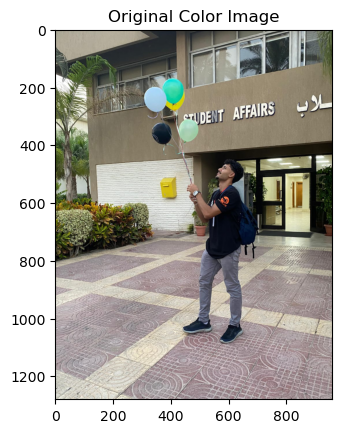

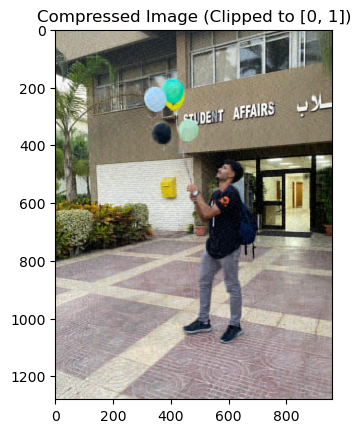

In [4]:
compressed_img = compress_img(r'C:\Users\jamal khaled\Downloads\jamal qualified to the ecpc finals!.png',80,True)

In [5]:
def save_compressed_img(output_path,img_compressed):
    try:
        plt.imsave(output_path, img_compressed)
        print(f"Compressed image saved to {output_path}")
    except Exception as e:
        print(f"Error saving the image: {e}")

In [6]:
save_compressed_img(r'D:\compressed_img.jpg',compressed_img)

Compressed image saved to D:\compressed_img.jpg
